# Загрузка данных

In [ ]:
import torch 
import torch.nn as nn
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from torchsummary import summary

import zipfile
import os
import time
from PIL import Image
import cv2
from cv2 import imread
import random

from skimage.transform import resize
from skimage import io

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

Mounted at /content/drive


In [ ]:
!pip install -q torchsummary

Загрузим датасет:

In [ ]:
zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/images_training_rev1.zip', 'r').extractall()
# zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/images_test_rev1.zip', 'r').extractall()

In [ ]:
zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/training_solutions_rev1.zip', 'r').extractall()
zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/central_pixel_benchmark.zip', 'r').extractall()

In [ ]:
training_solutions = pd.read_csv('/content/training_solutions_rev1.csv')

In [ ]:
training_solutions

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [ ]:
clas_sum = training_solutions.drop('GalaxyID', axis=1).sum()
col = training_solutions.drop('GalaxyID', axis=1).columns

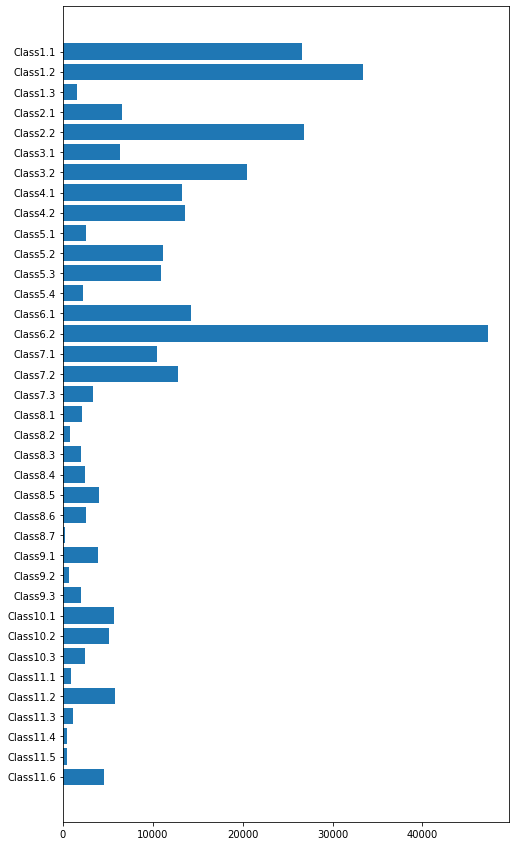

In [ ]:
plt.subplots(figsize=(8, 15))
plt.barh(col[::-1],clas_sum.iloc[::-1])
# ax.set_yticks(y_pos, labels=people)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
# ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
# training_solutions.info()

In [ ]:
# training_solutions.isnull().sum().sort_values(ascending=False)

In [ ]:
test_solutions = pd.read_csv('/content/central_pixel_benchmark.csv')

# Преобразование данных

In [ ]:
# image = cv2.imread("/content/drive/MyDrive/Google Фото/20150727_155352.jpg") # cv2.IMREAD_GRAYSCALE

In [ ]:
# plt.imshow(image)

In [ ]:
# ORIG_SHAPE = (424,424)
# CROP_SIZE = (256,256)
# IMG_SHAPE = (64,64)

# def get_image(path, x1,y1, shape, crop_size):
#     x = plt.imread(path)
#     x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
#     x = resize(x, shape)
#     return x
    
# def get_train_data(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
#     x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
#     y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
#     sel = dataframe.values
#     ids = sel[:,0].astype(int).astype(str)
#     y_batch = sel[:,1:].astype(np.float32)
#     x_batch = []
#     for i in tqdm(ids):
#         x = get_image("/content/images_training_rev1/"+i+".jpg", x1, y1, shape=shape, crop_size=crop_size)
#         x_batch.append(x.astype(np.float32))
#     x_batch = np.array(x_batch)
#     return x_batch, y_batch

In [ ]:
# X_train, y_train = get_train_data(training_solutions)

In [ ]:
# np.save('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/X_train', X_train)

In [ ]:
# np.save('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/y_train', y_train)

In [ ]:
# ORIG_SHAPE = (424,424)
# CROP_SIZE = (256,256)
# IMG_SHAPE = (64,64)

# def get_image(path, x1,y1, shape, crop_size):
#     x = plt.imread(path)
#     x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
#     x = resize(x, shape)
#     return x
    
# def get_train_data(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
#     x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
#     y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
#     sel = dataframe.values
#     ids = sel[:,0].astype(int).astype(str)
#     # y_batch = sel[:,1:].astype(np.float32)
#     x_batch = []
#     for i in tqdm(ids):
#         x = get_image("/content/images_test_rev1/"+i+".jpg", x1, y1, shape=shape, crop_size=crop_size)
#         x_batch.append(x.astype(np.float32))
#     x_batch = np.array(x_batch)
#     return x_batch

In [ ]:
# X_test = get_train_data(test_solutions)

In [ ]:
# np.save('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/X_test', X_test)

# Загрузка массивов 

In [ ]:
zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/DATA.zip', 'r').extractall()

In [ ]:
X_train_full = torch.tensor(np.load('/content/X_train.npy'))
y_train_full = torch.tensor(np.load('/content/y_train.npy'))

In [ ]:
X_train_full.shape[0]

61578

In [ ]:
X_test.shape[0]

79975

In [ ]:
X_test = torch.tensor(np.load('/content/X_test.npy'))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

In [ ]:
# plt.imshow(cv2.imread("/content/images_training_rev1/"+str(random.choice(training_solutions.GalaxyID))+".jpg"))

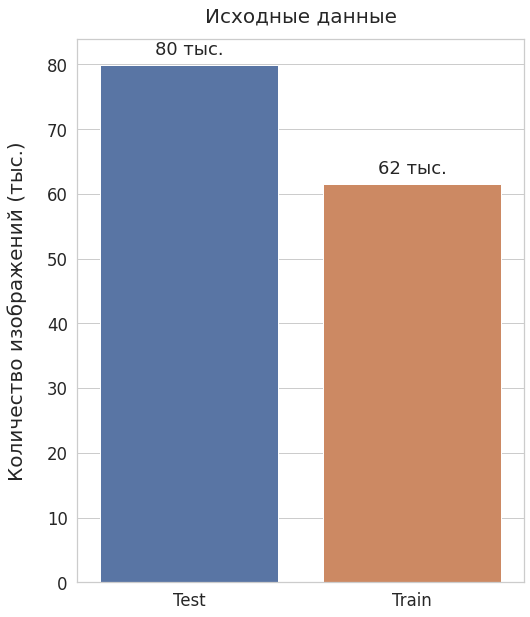

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=['Test', 'Train'], y=[X_test.shape[0]/1000, X_train_full.shape[0]/1000], palette="deep")

for p in ax.patches:
   ax.annotate(format(p.get_height(), '.0f')+' тыс.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Исходные данные', size = 20, y = 1.02)
# plt.xlabel('Выборки', size = 20, labelpad = 20.0)
plt.ylabel('Количество изображений (тыс.)', size = 20, labelpad = 20.0)
plt.show()

# Примеры картинок до и после обрезки

Изображения в оригинальном размере: 

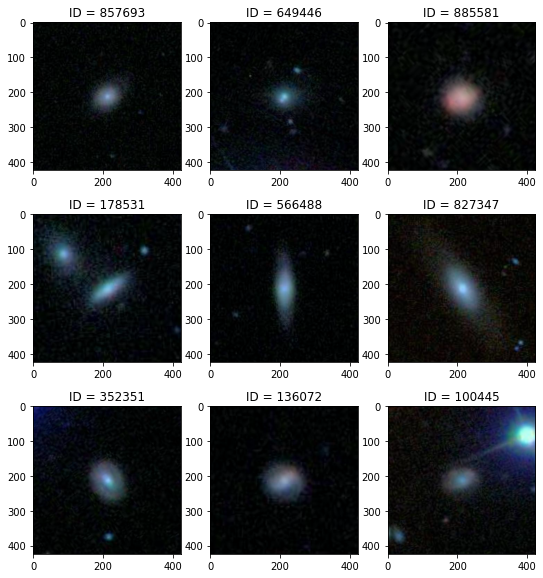

<Figure size 432x288 with 0 Axes>

In [ ]:
random.seed(6)
plt.figure(1, figsize=(9, 10))
plt.axis('off')
n = 0
sample = [] # сохраним индексы картинок для отображения их в обрезанном виде
for i in range(9):
  n += 1
  ID = random.choice(training_solutions.GalaxyID)
  random_img = "/content/images_training_rev1/"+str(ID)+".jpg"
  index = training_solutions[training_solutions.GalaxyID==ID].index.values.astype(int)
  sample.append(int(index))
  pic_title = 'ID = '+str(ID) # подпись к картинкам
  imgs = imread(random_img)
  plt.subplot(3, 3, n)
  plt.title(pic_title)
  # plt.axis('off')
  plt.imshow(imgs)

plt.show()
path = '/content/drive/MyDrive/Colab Notebooks/Дипломный проект/До обрезки.jpg' 
plt.savefig(path)

Изображения после обрезки: 

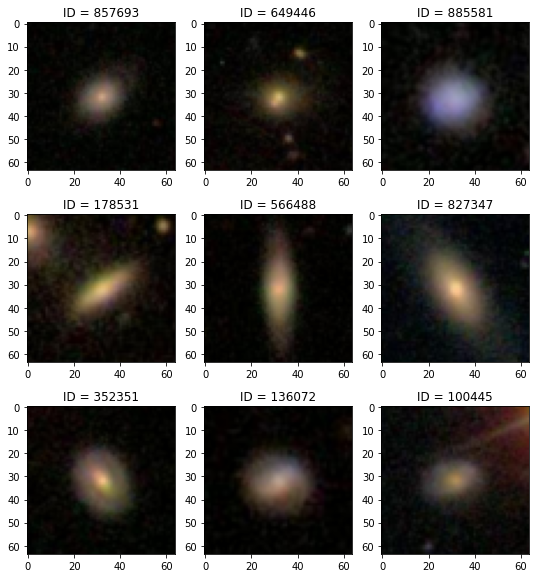

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1, figsize=(9, 10))
plt.axis('off')
n = 0
for i in range(9):
  n += 1
  pic_title = 'ID = '+str(training_solutions.GalaxyID.iloc[sample[i]]) # подпись к картинкам
  plt.subplot(3, 3, n)
  plt.title(pic_title)
  # plt.axis('off')
  plt.imshow(X_train_full[sample[i]])

plt.show()
path = '/content/drive/MyDrive/Colab Notebooks/Дипломный проект/После обрезки.jpg' 
plt.savefig(path)

# CNN

Построим модель сверточной нейросети:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=512, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),
            nn.ReLU(),
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 37),
            nn.Sigmoid()
          )
    
    def forward(self, input_batch: torch.Tensor):
        output_batch = self.model(input_batch)
        return output_batch

In [ ]:
# За основу взята AlexNet
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=512, kernel_size=3, stride=1, padding=1, padding_mode='zeros'), #(64-3)/1+1=62
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1), #(62-2)/1+1=61
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode='zeros'), #(61-3)/1+1=59
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1), #(59-2)/1+1=58
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),#(58-3)/1+1=56
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),#(56-3)/1+1=54
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode='zeros'),#(54-3)/1+1=52
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=1),#(52-2)/1+1=51
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.Linear(256, 4096),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(4096, 37),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Sigmoid()
          )
    
    def forward(self, input_batch: torch.Tensor):
        output_batch = self.model(input_batch)
        return output_batch

In [ ]:
def teach_nn(model, critirion, optimizer, n_epochs = 15):
  global batch_size, losses, eval_losses
  batch_size = 50
  losses = []
  eval_losses = []
  # loss_list = np.zeros((n_epochs,))

  for epoch in range(n_epochs):
      model.train()
      current_epoch_train_losses = []
      for i in tqdm(range(0, X_train.shape[0], batch_size), 
                    desc='Training epoch {} from {}'.format(epoch, n_epochs)):
          x_batch = X_train[i: i + batch_size].to(device)
          y_batch = y_train[i: i + batch_size].to(device) 
          x_batch = x_batch.float()

          optimizer.zero_grad()
          
          model_output = model(x_batch)
          loss = criterion(model_output, y_batch)
          
          loss.backward()
          optimizer.step()

          current_epoch_train_losses.append(loss.item())
      losses.append(np.array(current_epoch_train_losses).mean())
      
      model.eval()
      current_epoch_eval_losses = []
      for i in range(0, X_val.shape[0], batch_size):
          x_batch = X_val[i: i + batch_size].to(device)
          y_batch = y_val[i: i + batch_size].to(device)
          x_batch = x_batch.float()
        
          with torch.no_grad():
              model_output = model(x_batch)
              loss = criterion(model_output, y_batch)
              
          current_epoch_eval_losses.append(loss.item())
      
      eval_losses.append(np.array(current_epoch_eval_losses).mean())

In [ ]:
def show_loss(plot_name, plot_title):
  fig, ax = plt.subplots(figsize=(8,8), sharex=True)
  ax.plot(losses, label='train')
  ax.plot(eval_losses, label='validation')
  ax.set_xlabel('Epochs', size = 15, labelpad = 15.0)
  ax.set_ylabel('Loss', size = 15, labelpad = 15.0)
  ax.legend(fontsize = 15)
  plt.title(plot_title, size = 15, y = 1.02)
  path = '/content/drive/MyDrive/Colab Notebooks/Дипломный проект/'+plot_name+'.png' 
  plt.savefig(path);

# Обучение и отрисовка CNN моделей 

In [ ]:
# del model_1

Training epoch 0 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 1 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 2 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 3 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 4 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 5 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 6 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 7 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 8 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 9 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 10 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 11 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 12 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 13 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 14 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 15 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 16 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 17 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 18 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 19 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 20 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 21 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 22 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 23 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 24 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 25 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 26 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 27 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 28 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 29 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 30 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 31 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 32 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 33 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 34 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

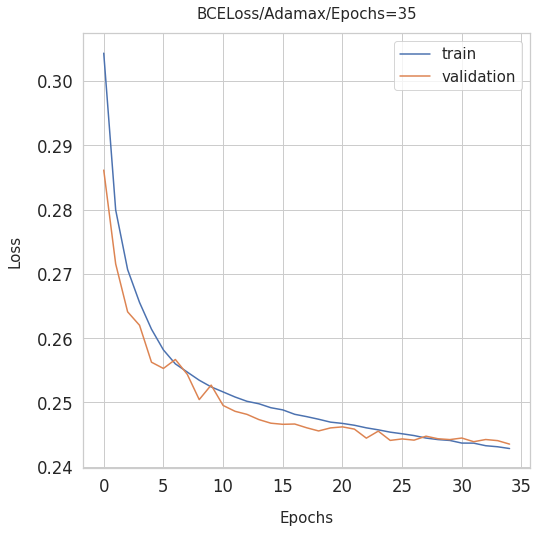

In [ ]:
model_1 = ImageClassifier().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adamax(model_1.parameters(), lr=0.001)

teach_nn(model_1, criterion, optimizer, n_epochs = 35)

show_loss('BCELoss_Adamax_Epochs=35', 'BCELoss/Adamax/Epochs=35')

Training epoch 0 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 1 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 2 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 3 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 4 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 5 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 6 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 7 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 8 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 9 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 10 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 11 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 12 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 13 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 14 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 15 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 16 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 17 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 18 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 19 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 20 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 21 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 22 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 23 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 24 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 25 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 26 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 27 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 28 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 29 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 30 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 31 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 32 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 33 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 34 from 35:   0%|          | 0/986 [00:00<?, ?it/s]

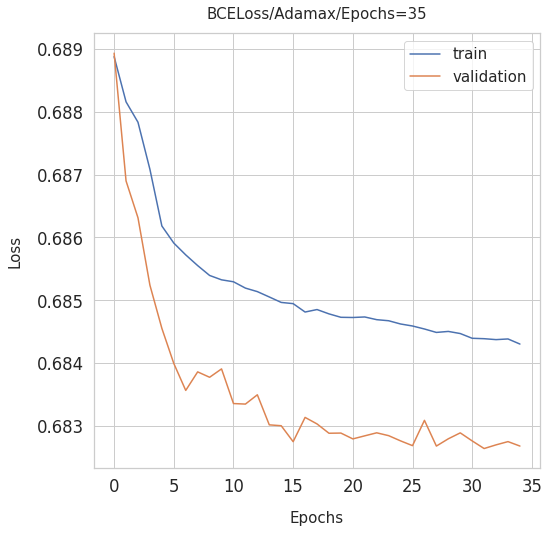

In [ ]:
model_2 = ImageClassifier().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adamax(model_2.parameters(), lr=0.001)

teach_nn(model_2, criterion, optimizer, n_epochs = 35)

show_loss('Alex_Net_BCELoss_Adamax_Epochs=35', 'BCELoss/Adamax/Epochs=35')

Training epoch 0 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 1 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 2 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 3 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 4 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 5 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 6 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 7 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 8 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 9 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 10 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 11 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 12 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 13 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 14 from 15:   0%|          | 0/986 [00:00<?, ?it/s]

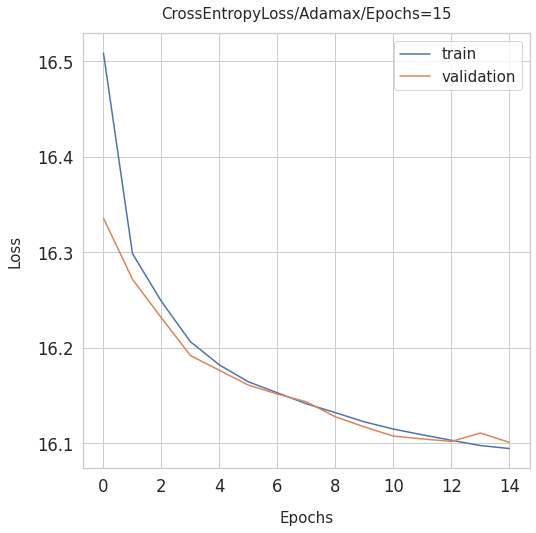

In [ ]:
model_3 = ImageClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model_3.parameters(), lr=0.001)

teach_nn(model_3, criterion, optimizer, n_epochs = 15)

show_loss('CrossEntropyLoss_Adamax_Epochs=15', 'CrossEntropyLoss/Adamax/Epochs=15')

Training epoch 0 from 5:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 1 from 5:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 2 from 5:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 3 from 5:   0%|          | 0/986 [00:00<?, ?it/s]

Training epoch 4 from 5:   0%|          | 0/986 [00:00<?, ?it/s]

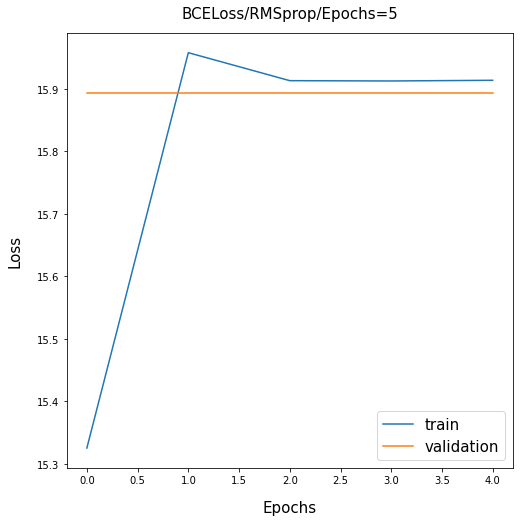

In [ ]:
model_4 = ImageClassifier().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(model_4.parameters(), lr=0.001)

teach_nn(model_4, criterion, optimizer, n_epochs = 5)

show_loss('BCELoss_RMSprop_Epochs=5', 'BCELoss/RMSprop/Epochs=5')

# Результат на тестовых данных

In [ ]:
predict = []
for i in range(0, X_test.shape[0], batch_size):
        x_batch = X_test[i: i + batch_size].to(device)
        x_batch = x_batch.float()
        
        with torch.no_grad():
            model_output = model_3(x_batch).cpu().numpy()
            predict.append(model_output)
predict = np.vstack(predict)

ids = test_solutions['GalaxyID'].apply(lambda x:str(x)).to_numpy()
ids = ids.reshape(len(ids),1)
submission = pd.DataFrame(np.hstack((ids, predict)), columns=test_solutions.columns)
from pathlib import Path  
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Дипломный проект/CrossEntropyLoss_Adamax_Epochs=15.csv', index=False)